# BackTest Result Visualization

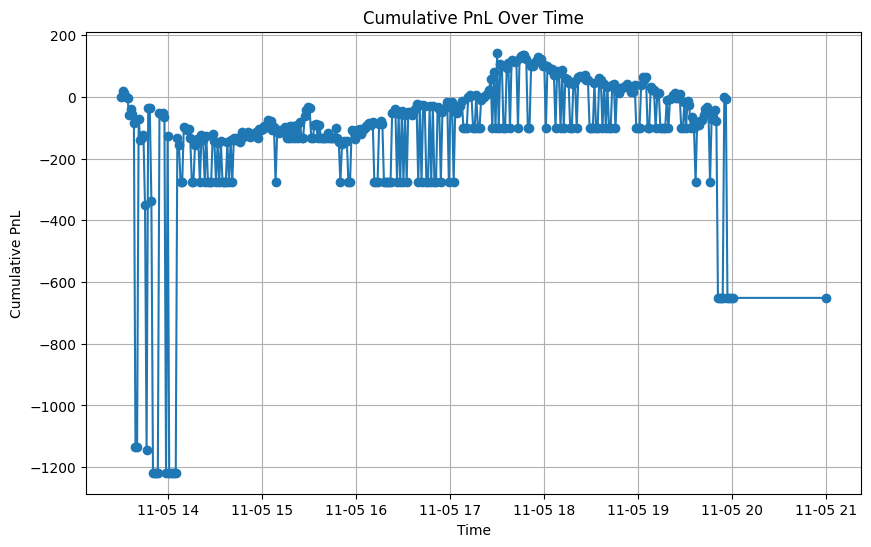

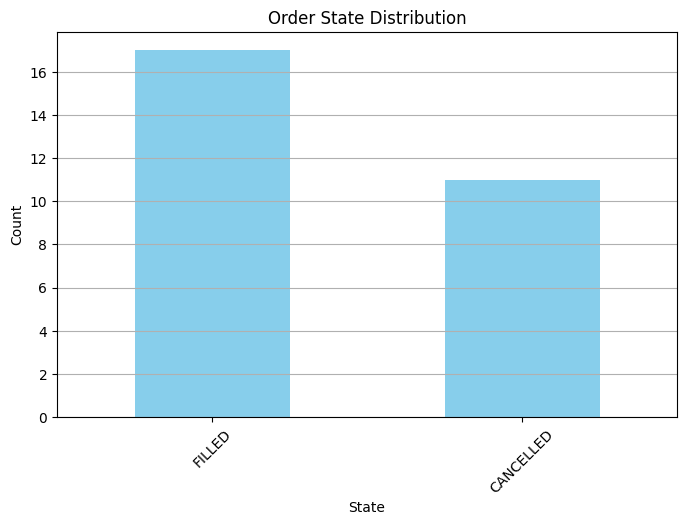

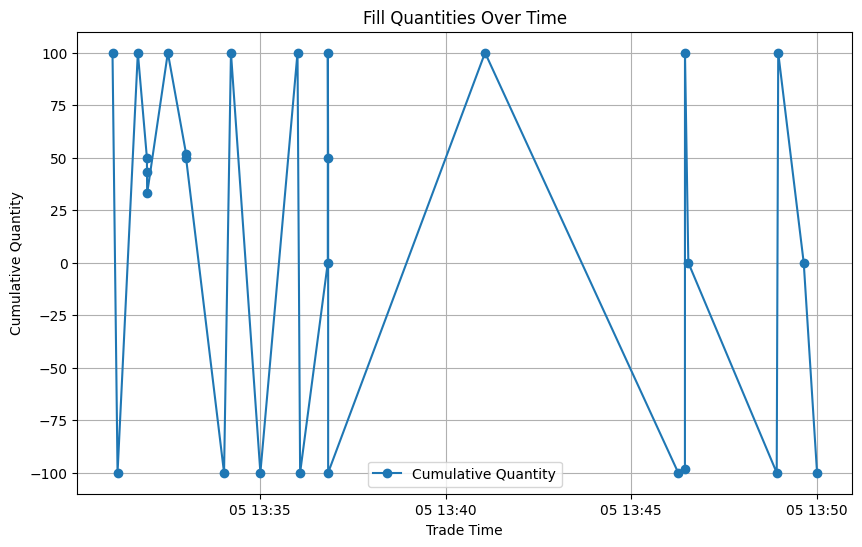

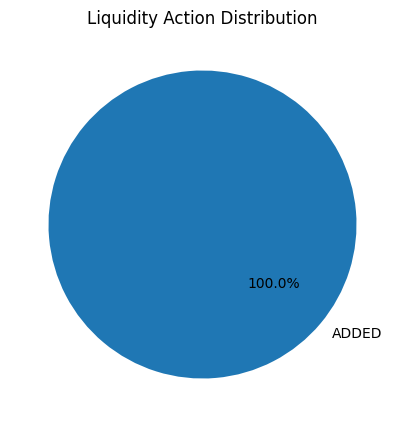

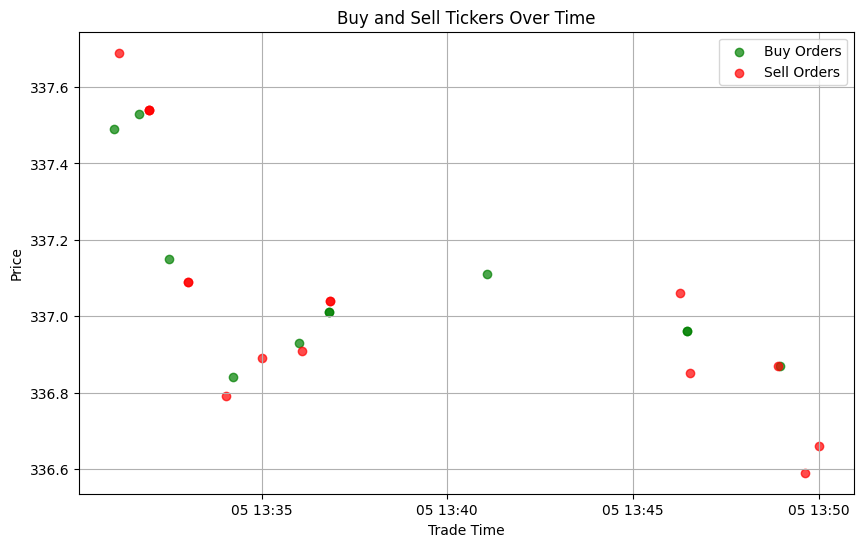

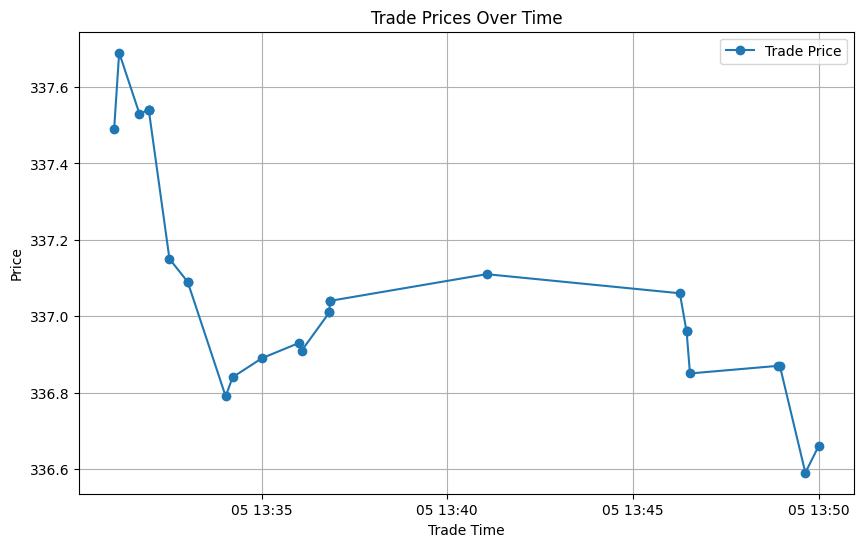

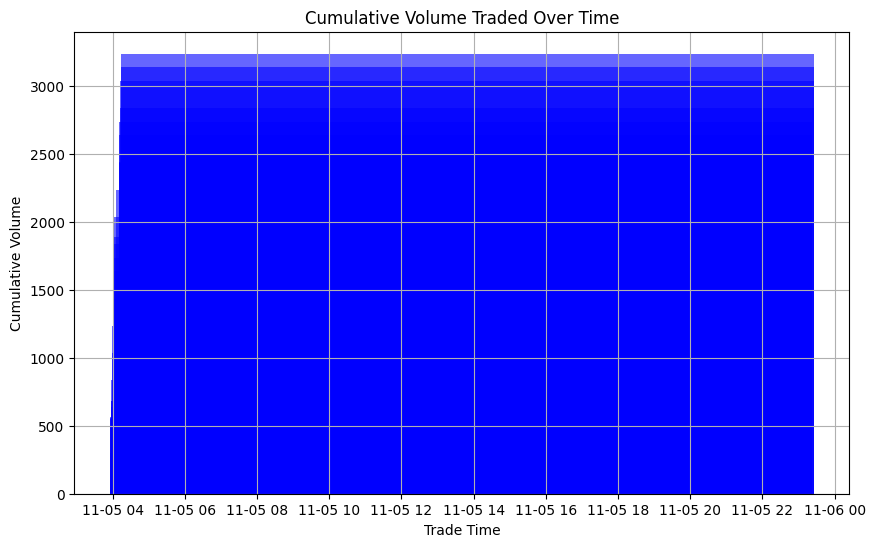

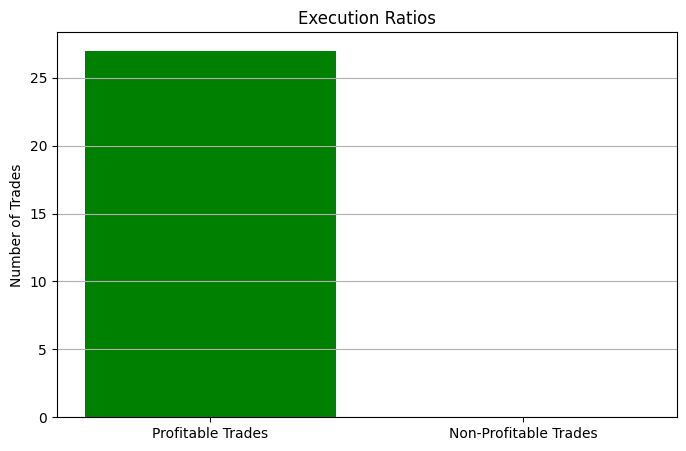

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def find_file_by_suffix(directory, suffix):
    """Finds a file in the directory with a specific suffix."""
    files = glob.glob(os.path.join(directory, f"*{suffix}"))
    if files:
        return files[0]  # Return the first match
    else:
        raise FileNotFoundError(f"No file ending with {suffix} found in {directory}")

def safe_to_datetime(column):
    """Safely converts a column to datetime, handling inconsistent formats."""
    return pd.to_datetime(column, errors='coerce')

def visualize_trading_data(output_dir):
    # Find files based on suffix
    fill_file = find_file_by_suffix(output_dir, "_fill.csv")
    order_file = find_file_by_suffix(output_dir, "_order.csv")
    pnl_file = find_file_by_suffix(output_dir, "_pnl.csv")

    # Read CSV files
    fill_df = pd.read_csv(fill_file)
    order_df = pd.read_csv(order_file)
    pnl_df = pd.read_csv(pnl_file)

    # Convert time columns to datetime safely
    pnl_df['Time'] = safe_to_datetime(pnl_df['Time'])
    fill_df['TradeTime'] = safe_to_datetime(fill_df['TradeTime'])
    order_df['EntryTime'] = safe_to_datetime(order_df['EntryTime'])

    # Drop rows with invalid dates, if necessary
    pnl_df = pnl_df.dropna(subset=['Time'])
    fill_df = fill_df.dropna(subset=['TradeTime'])
    order_df = order_df.dropna(subset=['EntryTime'])

    # Plot Cumulative PnL over Time
    plt.figure(figsize=(10, 6))
    plt.plot(pnl_df['Time'], pnl_df['Cumulative PnL'], marker='o')
    plt.title('Cumulative PnL Over Time')
    plt.xlabel('Time')
    plt.ylabel('Cumulative PnL')
    plt.grid()
    plt.show()

    # Plot Order State Distribution
    plt.figure(figsize=(8, 5))
    state_counts = order_df['State'].value_counts()
    state_counts.plot(kind='bar', color='skyblue')
    plt.title('Order State Distribution')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Plot Fill Quantities Over Time
    plt.figure(figsize=(10, 6))
    plt.plot(fill_df['TradeTime'], fill_df['Quantity'].cumsum(), marker='o', label='Cumulative Quantity')
    plt.title('Fill Quantities Over Time')
    plt.xlabel('Trade Time')
    plt.ylabel('Cumulative Quantity')
    plt.legend()
    plt.grid()
    plt.show()

    # Liquidity Action Pie Chart
    plt.figure(figsize=(8, 5))
    liquidity_counts = fill_df['LiquidityAction'].value_counts()
    liquidity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Liquidity Action Distribution')
    plt.ylabel('')  # Remove default ylabel
    plt.show()

    # Scatter Plot for Buy and Sell Tickers
    buy_trades = fill_df[fill_df['Quantity'] > 0]
    sell_trades = fill_df[fill_df['Quantity'] < 0]
    plt.figure(figsize=(10, 6))
    plt.scatter(buy_trades['TradeTime'], buy_trades['Price'], color='green', label='Buy Orders', alpha=0.7)
    plt.scatter(sell_trades['TradeTime'], sell_trades['Price'], color='red', label='Sell Orders', alpha=0.7)
    plt.title('Buy and Sell Tickers Over Time')
    plt.xlabel('Trade Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Trade Prices Over Time
    plt.figure(figsize=(10, 6))
    plt.plot(fill_df['TradeTime'], fill_df['Price'], marker='o', label='Trade Price')
    plt.title('Trade Prices Over Time')
    plt.xlabel('Trade Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Cumulative Volume Traded Over Time
    fill_df['Volume'] = fill_df['Quantity'].abs()
    plt.figure(figsize=(10, 6))
    plt.bar(fill_df['TradeTime'], fill_df['Volume'].cumsum(), color='blue', alpha=0.6)
    plt.title('Cumulative Volume Traded Over Time')
    plt.xlabel('Trade Time')
    plt.ylabel('Cumulative Volume')
    plt.grid()
    plt.show()

    # Execution Ratios
    total_trades = len(fill_df)
    profitable_trades = len(fill_df[fill_df['ExecutionCost'] > 0])
    non_profitable_trades = total_trades - profitable_trades

    plt.figure(figsize=(8, 5))
    plt.bar(['Profitable Trades', 'Non-Profitable Trades'], [profitable_trades, non_profitable_trades], color=['green', 'red'])
    plt.title('Execution Ratios')
    plt.ylabel('Number of Trades')
    plt.grid(axis='y')
    plt.show()

# Example usage
visualize_trading_data("/home/vagrant/group_02_project/toy_strategy/output")
